In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import wfdb

In [3]:
record = wfdb.rdrecord('../../../Data/mit-bih-arrhythmia-database-1.0.0/100')
annotation = wfdb.rdann('../../../Data/mit-bih-arrhythmia-database-1.0.0/100', 'atr')

In [4]:
signals = record.p_signal
fs = record.fs
channel_names = record.sig_name

In [5]:
print(channel_names)

['MLII', 'V5']


In [6]:
data = signals.T

info = mne.create_info(ch_names=channel_names, sfreq=fs, ch_types='ecg')
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=2, n_times=650000
    Range : 0 ... 649999 =      0.000 ...  1805.553 secs
Ready.


In [7]:
print(raw.info)
print(raw.info.ch_names)

<Info | 7 non-empty values
 bads: []
 ch_names: MLII, V5
 chs: 2 ECG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 180.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 360.0 Hz
>
['MLII', 'V5']


In [8]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [9]:
ecg_events, _, _ = mne.preprocessing.find_ecg_events(raw)
raw.plot(events=ecg_events, event_color='r', duration=10, start=0)

Using channel MLII to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 3600 samples (10.000 s)



/tmp/ipykernel_201480/380019367.py:1: RuntimeWarning: More than one ECG channel found. Using only MLII.
  ecg_events, _, _ = mne.preprocessing.find_ecg_events(raw)


Number of ECG events detected : 2227 (average pulse 74.00492307692308 / min.)


Channels marked as bad:
none


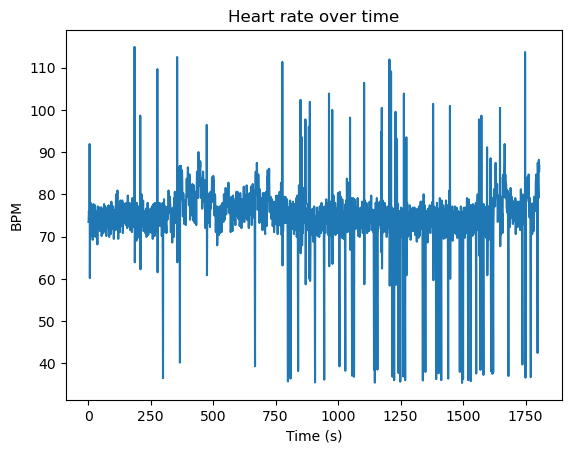

In [10]:
# calculate HRV
beat_times = raw.times[ecg_events[:, 0]]
rr_intervals = np.diff(beat_times)
heart_rate = 60. / rr_intervals

import matplotlib.pyplot as plt
plt.plot(beat_times[1:], heart_rate)
plt.title("Heart rate over time")
plt.xlabel("Time (s)")
plt.ylabel("BPM")
plt.show()

In [12]:
onsets = annotation.sample / fs
descriptions = annotation.symbol

mne_annotations = mne.Annotations(onset=onsets, duration=[0]*len(onsets), description=descriptions)
raw.set_annotations(mne_annotations)

<RawArray | 2 x 650000 (1805.6 s), ~9.9 MiB, data loaded>

In [14]:
raw.plot(events=ecg_events, event_color='r', duration=10, start=0)